In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
'''Pipeline: Combines preprocessing and modeling into one streamlined object so you can fit and predict in one go'''
from sklearn.pipeline import Pipeline
'''ColumnTransformer Applies different preprocessing steps to different columns'''
from sklearn.compose import ColumnTransformer
'''Scales numerical features to have a mean of 0 and standard deviation of 1.'''
from sklearn.preprocessing import StandardScaler
'''Fills missing values in data with the following strategies: 'mean', 'median', 'most_frequent' '''
from sklearn.impute import SimpleImputer
'''one hot encoder --Converts categorical features into binary vectors 0s and 1s'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
''' Implements a Support Vector Machine classifier'''
from sklearn.svm import SVC

In [4]:
dataset=pd.read_csv('loan(1).csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
dataset.shape

(614, 13)

In [6]:
X=dataset.drop(columns=['Loan_ID','Loan_Status'])
y=dataset['Loan_Status']

In [10]:
categorical_features=X.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [11]:
numeric_features=X.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
y.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [16]:
y_train.value_counts(normalize=True)

Y    0.686354
N    0.313646
Name: Loan_Status, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

Y    0.691057
N    0.308943
Name: Loan_Status, dtype: float64

In [18]:
numeric_transform=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [19]:
categorical_transform=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
X.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [21]:
preprocessor=ColumnTransformer(
        transformers=[
            ('num',numeric_transform,numeric_features),
            ('cat',categorical_transform,categorical_features)
        ])

In [23]:
clf=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',SVC(kernel='linear'))
])

In [24]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', SVC(kernel='linear'))])

In [25]:
score=clf.score(X_test,y_test)
print('accuracy',score)

accuracy 0.8536585365853658


In [26]:
X_test_prediction=clf.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_prediction)
test_data_accuracy

0.8536585365853658

In [27]:
cf=confusion_matrix(y_test,X_test_prediction)
cf

array([[21, 17],
       [ 1, 84]], dtype=int64)

In [28]:
clf.classes_

array(['N', 'Y'], dtype=object)

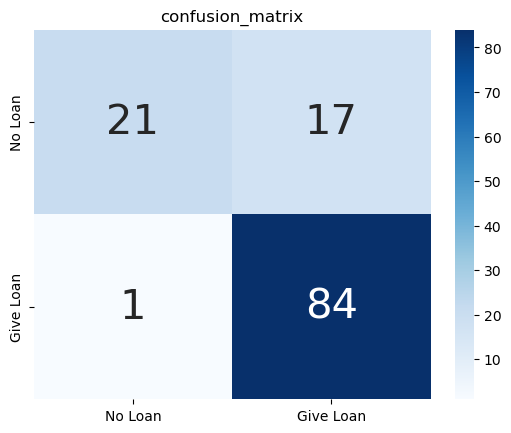

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.axes()
df_cm=cf
sns.heatmap(df_cm, annot=True,
           annot_kws={"size":30}, fmt='d',cmap="Blues",
           xticklabels=['No Loan','Give Loan'],
           yticklabels=['No Loan','Give Loan'],ax=ax)
ax.set_title('confusion_matrix')
plt.show()